In [30]:
from scipy.special import jv
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple

In [39]:
def spacingD1(angle : float) -> float:
    '''Returns spacing for l1 pattern from R=0'''
    return BASIS_A0*np.cos(angle)

def spacingD2(angle : float) -> float:
    '''Returns spacing for l2 pattern from R=0'''
    return BASIS_A0*np.cos((60*np.pi/180) - angle)

def spacingD3(angle : float) -> float:
    '''Returns spacing for l3 pattern from R=0'''
    return BASIS_A0*np.cos((60*np.pi/180) + angle)

def spacingD4(angle : float) -> float:
    '''Returns spacing for l4 pattern from R=0'''
    return np.sqrt(3)*BASIS_A0*np.cos((30*np.pi/180) - angle)

def l1(chiralIndices : NamedTuple, vals : np.ndarray,
       d : float) -> float:
    '''Returns spacing for l1'''
    return np.abs(jv(chiralIndices.m, np.pi * d * vals))**2

def l2(chiralIndices : NamedTuple, vals : np.ndarray,
       d : float) -> float:
    '''Returns spacing for l2'''
    return np.abs(jv(chiralIndices.n, np.pi * d * vals))**2

def l3(chiralIndices : NamedTuple, vals : np.ndarray,
      d : float) -> float:
    '''Returns spacing for l3'''
    return np.abs(jv(chiralIndices.n + chiralIndices.m,
                     np.pi * d * vals))**2

def l4(chiralIndices : NamedTuple, vals : np.ndarray,
       d : float) -> float:
    '''Returns spacing for l4'''
    return np.abs(jv(chiralIndices.n - chiralIndices.m,
              np.pi * d * vals))**2

def diffraction(chiralIndices : NamedTuple, vals : np.ndarray,
       d : float) -> List[Tuple[int, np.ndarray]]:
    '''Returns list of tuples of spacing for diffraction pattern and diffraction pattern to be plotted'''
    angle = chiralAngle(chiralIndices)

    intensity1 = l1(chiralIndices, vals, d)
    intensity2 = l2(chiralIndices, vals, d)
    intensity3 = l3(chiralIndices, vals, d)
    intensity4 = l4(chiralIndices, vals, d)

    position1  = spacingD1(angle)
    position2  = spacingD2(angle)
    position3  = spacingD3(angle)
    position4  = spacingD4(angle)

    return [(intensity1, position1), (intensity2, position2), (intensity3, position3), (intensity4, position4)]

In [ ]:
x   = np.arange(0, 10, 0.01)
j_1 = jv(1, x)
j_2 = jv(2, x)
j_3 = jv(3, x)

In [ ]:
# plt.plot(x, j_1, x, j_2, x, j_3)
# plt.show()

In [ ]:
x   = np.arange(-10*2*np.pi, 10*2*np.pi, 0.01)
j_1 = np.abs(jv(1, x))**2
j_2 = np.abs(jv(2, x))**2
j_3 = np.abs(jv(3, x))**2
j_8 = np.abs(jv(8, x))**2

# plt.plot(x, j_1, label = '$J_1^2$')
# plt.plot(x, j_2, label = '$J_2^2$')
# plt.plot(x, j_3, label = '$J_3^2$')
plt.plot(x, j_3, label = '$J_8^2$')
# plt.xlabel('radial distance')
# plt.ylabel('layer line (not normalized)')
# plt.legend()
# plt.show()

In [ ]:
# x   = np.arange(-10*2*np.pi, 10*2*np.pi, 0.01)

for i in range(1, 9):
    j = jv(i, x)
    plt.imshow(np.atleast_2d(j), cmap = plt.get_cmap('Blues'),
              extent=(-10*2*np.pi, 10*2*np.pi, 0, 1))
    plt.title(f'|J_{i}|^2')
plt.xlabel('radial distance')
plt.yticks([])
plt.show()

In [ ]:
# import seaborn as sns
# # Basic 2D density plot
# sns.set_style("white")
# sns.kdeplot(x, j_8)
# # Custom it with the same argument as 1D density plot
# sns.kdeplot(x, j_8, cmap="Greys", shade=True)

In [ ]:
# # Some features are characteristic of 2D: color palette and wether or not color the lowest range
# x_plot = np.zeros_like(x)
# x_plot[len(x)//2] = x_plot[len(x)//2+1]  = 1
# sns.kdeplot(x_plot, j_8, cmap="Greys", shade=True, shade_lowest=False, )
# plt.show()

In [ ]:
# x_plot = np.nan_like(x)
# x_plot[len(x)//2] = x_plot[len(x)//2+1]  = 1
# C = zip(*(x_plot, j_8))
# plt.pcolormesh(x, np.linspace(-5, 5, 12567), C)

In [ ]:
x = np.linspace(-10*2*np.pi, 10*2*np.pi, 500)
y = np.linspace(-5, 5, 500)
y_plot = np.zeros_like(y)
y_plot[len(y)//2:len(y)//2+5] = 1
(X,Y) = np.meshgrid(x,y_plot)
a = np.abs(jv(3, X))**2 * Y

In [ ]:
plt.pcolormesh(x, y, a,cmap='Greys')
plt.xticks([])
plt.yticks([])

In [ ]:
x = np.linspace(-10*2*np.pi, 10*2*np.pi, 100)
y = np.linspace(-5, 5, 100)

space = len(x)//25
for i in range(25):
    y_plot = np.full_like(y, np.nan, dtype=np.double)
    y_plot[space*i:space*i+5] = 1
    (X,Y) = np.meshgrid(x,y_plot)
    a = np.abs(jv(i, X))**2 * Y
    plt.pcolormesh(x, y, a,cmap='Greys')

p = RegularPolygon((0, 0), numVertices=6, 
               radius=2, orientation=0, fill=False, lw=1, color='grey')


ax = plt.gca()
ax.add_patch(p)

plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
from matplotlib.patches import Polygon
pts = np.array([[2,2], [6,5], [3,np.sqrt(5**2 - 2**2)]])
p = Polygon(pts, closed=True, fill=False, lw=1, color='grey')
ax = plt.gca()
ax.add_patch(p)
ax.set_xlim(1,7)
ax.set_ylim(1,8)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon

p = RegularPolygon((0, 5), numVertices=6, 
               radius=2, orientation=0, fill=False, lw=1, color='grey')


ax = plt.gca()
ax.add_patch(p)

plt.autoscale(enable = True)
plt.show()


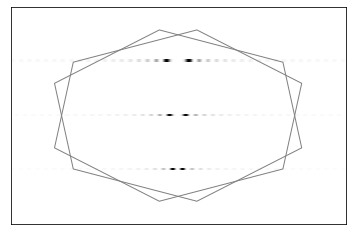

In [11]:
from matplotlib.patches import Polygon

x = np.linspace(-10*2*np.pi, 10*2*np.pi, 1000)
y = np.linspace(-10*2*np.pi, 10*2*np.pi, 1000)

space = len(x)//4
for i in range(1, 4):
    y_plot = np.full_like(y, np.nan, dtype=np.double)
    y_plot[space*i:space*i+5] = 1
    (X,Y) = np.meshgrid(x,y_plot)
    a = np.abs(jv(i, X))**2 * Y
    plt.pcolormesh(x, y, a,cmap='Greys')

p1 = RegularPolygon((0, 0), numVertices=6, 
               radius=50, orientation=0.282795699/2, 
                    fill=False, lw=1, color='grey')
p2 = RegularPolygon((0, 0), numVertices=6, 
               radius=50, orientation=-0.282795699/2, 
                    fill=False, lw=1, color='grey')

# p = Polygon(pts, closed=True, fill=False, lw=1, color='grey')
# ax = plt.gca()
# ax.add_patch(p)
# plt.show()
ax = plt.gca()
ax.add_patch(p1)
ax.add_patch(p2)

plt.xticks([])
plt.yticks([])

plt.show()

In [50]:
# (5, 2) (n,m)
#l_1 = J_2
#l_2 = J_5
#l_3 = J_7
#l_4 = J_3

$\begin{array}{c}{I_{l 1}(R) \propto\left|J_{m}(\pi \mathrm{d} R)\right|^{2}} \\ {I_{l 2}(R) \propto\left|J_{-n}(\pi \mathrm{d} R)\right|^{2}=\left|J_{n}(\pi \mathrm{d} R)\right|^{2}} \\ {I_{l 3}(R) \propto\left|J_{n+m}(\pi \mathrm{d} R)\right|^{2}}\end{array}$
$\begin{array}{l}{\text { and }} \\ {\qquad I_{4}(R) \propto\left|J_{-(n-m)}(\pi \mathrm{d} R)\right|^{2}=\left|J_{n-m}(\pi \mathrm{d} R)\right|^{2}}\end{array}$

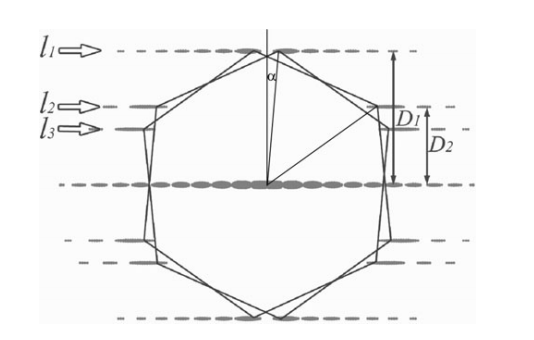

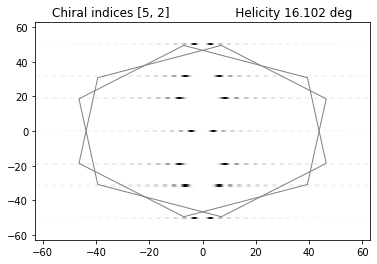

In [51]:
from matplotlib.patches import Polygon
from matplotlib.patches import RegularPolygon

x = np.linspace(-10*2*np.pi, 10*2*np.pi, 1000)
y = np.linspace(-10*2*np.pi, 10*2*np.pi, 1000)

#l_1 = J_2
y_plot = np.full_like(y, np.nan, dtype=np.double)
y_plot[96:102] = 1
(X,Y) = np.meshgrid(x,y_plot)
a = np.abs(jv(2, X))**2 * Y
plt.pcolormesh(x, y, a,cmap='Greys')

#l_1 = J_2
y_plot = np.full_like(y, np.nan, dtype=np.double)
y_plot[898:904] = 1
(X,Y) = np.meshgrid(x,y_plot)
a = np.abs(jv(2, X))**2 * Y
plt.pcolormesh(x, y, a,cmap='Greys')

n=150
#l_2 = J_5
y_plot = np.full_like(y, np.nan, dtype=np.double)
y_plot[96+n:102+n] = 1
(X,Y) = np.meshgrid(x,y_plot)
a = np.abs(jv(5, X))**2 * Y
plt.pcolormesh(x, y, a,cmap='Greys')

#l_2 = J_5
y_plot = np.full_like(y, np.nan, dtype=np.double)
y_plot[898-n:904-n] = 1
(X,Y) = np.meshgrid(x,y_plot)
a = np.abs(jv(5, X))**2 * Y
plt.pcolormesh(x, y, a,cmap='Greys')

n=250
#l_3 = J_7
y_plot = np.full_like(y, np.nan, dtype=np.double)
y_plot[96+n:102+n] = 1
(X,Y) = np.meshgrid(x,y_plot)
a = np.abs(jv(7, X))**2 * Y
plt.pcolormesh(x, y, a,cmap='Greys')

#l_3 = J_7
y_plot = np.full_like(y, np.nan, dtype=np.double)
y_plot[898-n:904-n] = 1
(X,Y) = np.meshgrid(x,y_plot)
a = np.abs(jv(7, X))**2 * Y
plt.pcolormesh(x, y, a,cmap='Greys')

#l_4 = J_3
y_plot = np.full_like(y, np.nan, dtype=np.double)
y_plot[498:502] = 1
(X,Y) = np.meshgrid(x,y_plot)
a = np.abs(jv(3, X))**2 * Y
plt.pcolormesh(x, y, a,cmap='Greys')




p1 = RegularPolygon((0, 0), numVertices=6, 
               radius=50, orientation=0.282795699/2, 
                    fill=False, lw=1, color='grey')
p2 = RegularPolygon((0, 0), numVertices=6, 
               radius=50, orientation=-0.282795699/2, 
                    fill=False, lw=1, color='grey')


ax = plt.gca()
ax.add_patch(p1)
ax.add_patch(p2)

plt.title('Chiral indices [5, 2]                 Helicity 16.102 deg')
# plt.xticks([])
# plt.yticks([])

plt.show()

In [55]:
from typing import Tuple
#chiralIndices : tuple[n, m]
# n : int = chiralIndices[0]
# m : int = chiralIndices[1]
#chiralAngle : float = np.arctan(np.sqrt(3)*m / (2*n+m))    

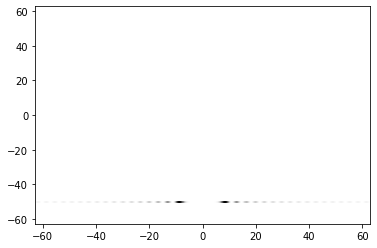

In [54]:
x = np.linspace(-10*2*np.pi, 10*2*np.pi, 1000)
y = np.linspace(-10*2*np.pi, 10*2*np.pi, 1000)
y_plot = np.full_like(y, np.nan, dtype=np.double)
y_plot[96:102] = 1
(X,Y) = np.meshgrid(x,y_plot)
a = np.abs(jv(7, X))**2 * Y

plt.pcolormesh(x, y, a,cmap='Greys')
ax = plt.gca()
plt.show()




In [14]:
from typing import NamedTuple
import numpy as np
import matplotlib.pyplot as plt
BASIS_A0 : int = 0.246 #nm

class chiralIndices(NamedTuple):
    n : int
    m : int

def chiralAngle(chiralIndices : NamedTuple) -> float:
    return np.arctan((np.sqrt(3)*chiralIndices.m) /
                     (2*chiralIndices.n + chiralIndices.m))

def diameter(chiralIndices : NamedTuple) -> float:
    return BASIS_A0/np.pi * np.sqrt(chiralIndices.n**2
                                    + chiralIndices.m**2
                                    + chiralIndices.n*chiralIndices.m)

In [40]:
indices = chiralIndices(10, 10)
print(diameter(indices))
print(chiralAngle(indices))
#note: mm scale
x = np.linspace(-5*np.pi, 5*np.pi, 1000)
y = np.linspace(-5*np.pi, 5*np.pi, 1000)
from scipy.special import jv

1.3562690827376085
0.5235987755982988


In [41]:
#diffraction(chiralIndices : NamedTuple, vals : np.ndarray,
#       R : float, d : float) -> List[Tuple[int, np.ndarray]]:
#    '''Returns list of tuples of spacing 
#     for diffraction pattern and diffraction pattern to be plotted'''

In [49]:
diffraction(indices, x, diameter(indices) )[0][1]

0.2130422493309719

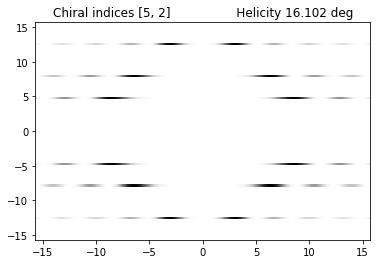

In [43]:
#l_1 = J_2
y_plot = np.full_like(y, np.nan, dtype=np.double)
y_plot[96:102] = 1
(X,Y) = np.meshgrid(x,y_plot)
a = np.abs(jv(2, X))**2 * Y
plt.pcolormesh(x, y, a,cmap='Greys')

#l_1 = J_2
y_plot = np.full_like(y, np.nan, dtype=np.double)
y_plot[898:904] = 1
(X,Y) = np.meshgrid(x,y_plot)
a = np.abs(jv(2, X))**2 * Y
plt.pcolormesh(x, y, a,cmap='Greys')

n=150
#l_2 = J_5
y_plot = np.full_like(y, np.nan, dtype=np.double)
y_plot[96+n:102+n] = 1
(X,Y) = np.meshgrid(x,y_plot)
a = np.abs(jv(5, X))**2 * Y
plt.pcolormesh(x, y, a,cmap='Greys')

#l_2 = J_5
y_plot = np.full_like(y, np.nan, dtype=np.double)
y_plot[898-n:904-n] = 1
(X,Y) = np.meshgrid(x,y_plot)
a = np.abs(jv(5, X))**2 * Y
plt.pcolormesh(x, y, a,cmap='Greys')

n=250
#l_3 = J_7
y_plot = np.full_like(y, np.nan, dtype=np.double)
y_plot[96+n:102+n] = 1
(X,Y) = np.meshgrid(x,y_plot)
a = np.abs(jv(7, X))**2 * Y
plt.pcolormesh(x, y, a,cmap='Greys')

#l_3 = J_7
y_plot = np.full_like(y, np.nan, dtype=np.double)
y_plot[898-n:904-n] = 1
(X,Y) = np.meshgrid(x,y_plot)
a = np.abs(jv(7, X))**2 * Y
plt.pcolormesh(x, y, a,cmap='Greys')


# ax = plt.gca()
# ax.add_patch(p1)
# ax.add_patch(p2)

plt.title('Chiral indices [5, 2]                 Helicity 16.102 deg')
# plt.xticks([])
# plt.yticks([])

plt.show()

In [ ]:
def l0(chiralIndices : NamedTuple, X : np.ndarray,
      Y : np.ndarray) -> np.ndarray:
    '''Returns spacing for l1'''
    return np.abs(jv(chiralIndices.m, X))**2 * Y